## Heart Disease Prediction

#### For this project, we have used a dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)

### 1. Import Libraries

 - numpy : Python library used for working with arrays
 - pandas : Python library used for data manipulation and analysis
 - matplotlib : modules used are pyplot, rcParams, rainbow
     - pyplot : It makes matplotlib work like a MATLAB. It is used to create figures, plot graphs, etc.
     - rcParams : 
     - rainbow : It is used to set different colors for each series in a matplotlib scatter plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
import math

Libraries for data processing 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### 2. Import Dataset

Now, we will import the dataset. The dataset is present in our system as 'heart.csv'. We will make use of Pandas library's read_csv() function to get the dataset. 
The dataset get loaded into the variable dataset. We can access and modify the dataset using this variable.

In [3]:
dataset = pd.read_csv('heart.csv')

To check whether dataset is correctly loaded, we will use some functions to take a glimpse of the dataset.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


From the dataset.info(), we come to know that there are 303 rows in our dataset. The dataset contains 0 missing values. 
There are 13 attributes we need to work on and one target attribute which has class value as either 1 or 0.

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The describe() method tells us about the range of values, the counts and the mean for each attribute. 

#### Now let us take a look at first 10 rows of the dataset

In [6]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Printing the correlation

In [7]:
print((dataset.corr()))

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

### 3. Dataset Visualization

We can visualize the dataset to understand it and look at any processing which may be needed.
By looking at the correlation matrix, we can see few features have negative correlation with the target while the others have positive correlation.

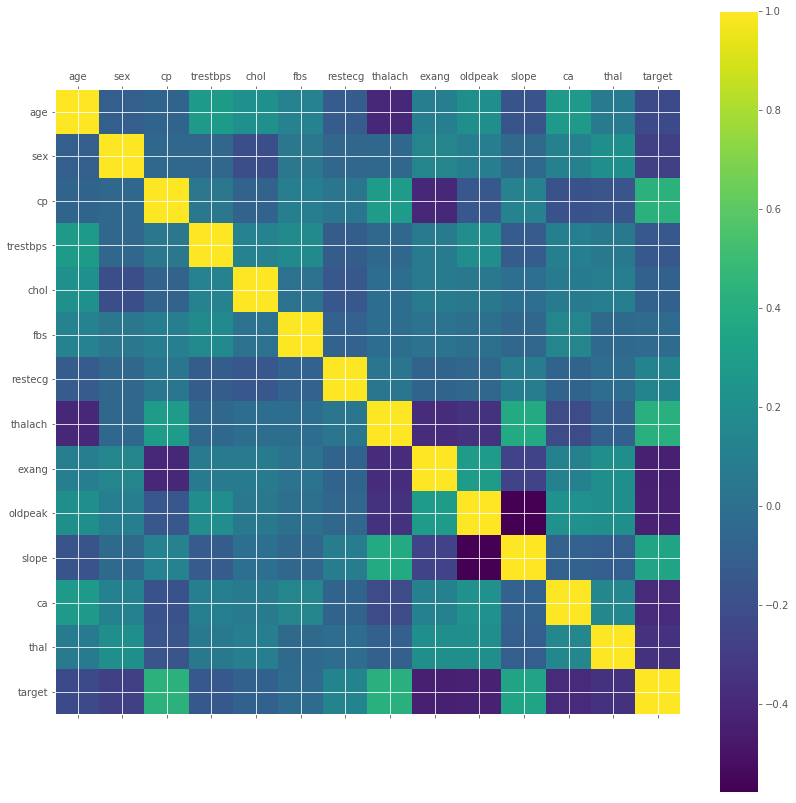

In [8]:
rcParams['figure.figsize'] = 20,14
plt.matshow(dataset.corr())
plt.xticks(np.arange(dataset.shape[1]),dataset.columns)
plt.yticks(np.arange(dataset.shape[1]),dataset.columns)
plt.colorbar()

Let's view histograms for each variable.
We can see every variable has a different range of distribution.
Hence, scaling before doing predictions should be of great use.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x096E54F0>,
      dtype=object)

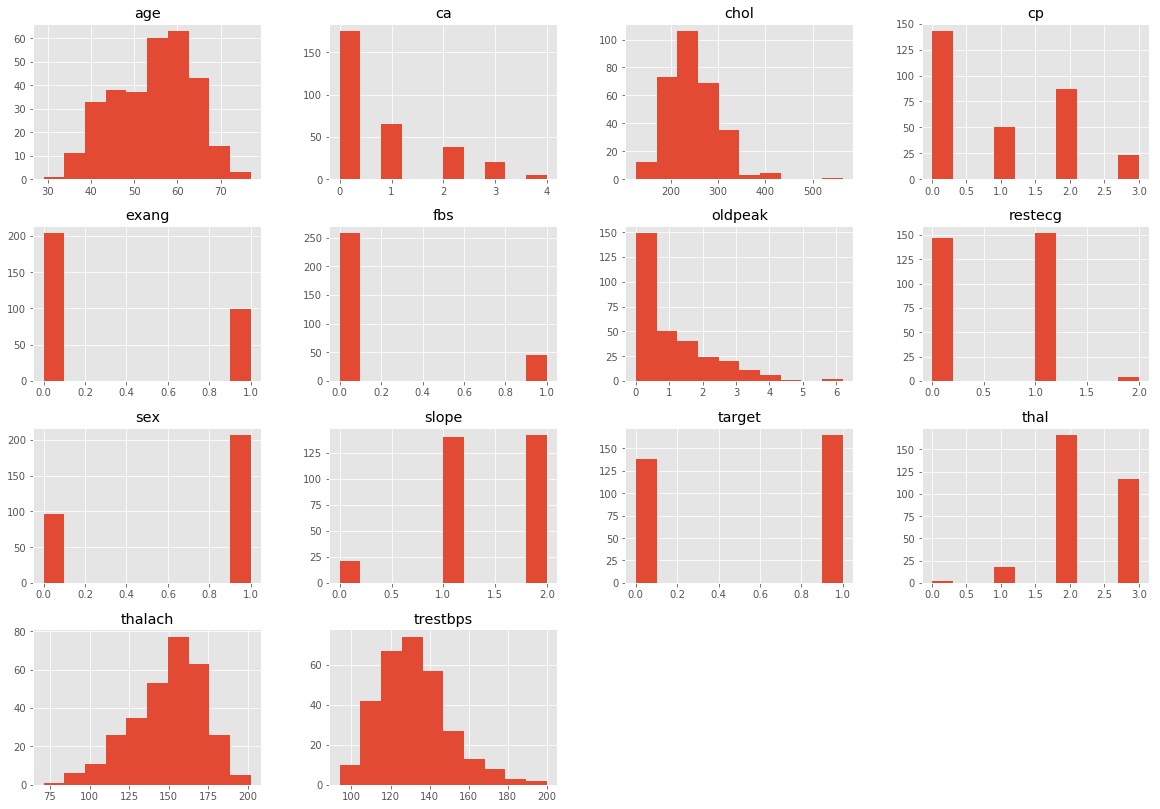

In [9]:
dataset.hist()

It's always a good practice to work with a dataset where the target classes are of approximately equal size.
We can see these two classes are nearly 50%. It is good enough to continue without dropping/increasing the data.

Text(0.5,1,'Count of each Target Class')

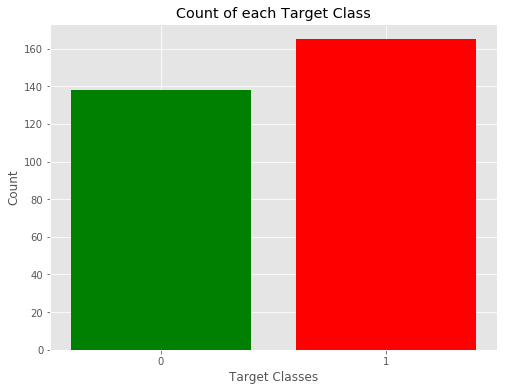

In [10]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### 4. Data Processing

After viewing the dataset, we came to a conclusion that we need to convert some categorial variables to dummy variables and scale all values before we start training the ML models. 
We use get_dummies() to create dummy columns for categorial variables.

In [11]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now we need to scale the dataset.
Library Sklearn is used for this purpose.

In [12]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

### 5. Data Spliting

Our dataset is not ready to be applied to Machine Learning algorithms now.
We need to split the data into training and testing data.
For this, we will use train_test_split().

In [13]:
# Split the data - 75% train, 25% test
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6. Modeling

<h4>Machine Learning</h4>

<h4>1. K Neighbours Classifier</h4>

The classification score varies based on different number of neighbors. 
Hence, we will plot a score graph for different values of K (neighbors) and check for the best score achieved.

minkowski_distance function helps to find the distance between 2 points

In [14]:
# Calculate distance between two points
def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

The function called knn_predict takes in all the training and test data,k, and p, and returns the predictions the KNN classifier makes for the test set (y_hat_test). 

In [15]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

In [16]:
# Obtain accuracy score varying k from 1 to 21
def find_accuracies():
    accuracies = []

    for k in range(1,21):
        scaler = StandardScaler()
        y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
        accuracies.append(accuracy_score(y_test, y_hat_test))
    print(accuracies)
    return accuracies

accuries[] hold the accuracy scores of different neighbours.
We will plot the graph to clearly see which value of K gives the best score.

In [17]:
def plot_graph(accuracies):
    plt.plot([k for k in range(1, 21)], accuracies, color = 'red')
    for i in range(1,21):
        plt.text(i, accuracies[i-1], (i, accuracies[i-1]))
    plt.xticks([i for i in range(1, 21)])
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Scores')
    plt.title('K Neighbors Classifier scores for different K values')

From above graph, we can clearly see the maximum score that was achieved was 0.85 with k=9

In [18]:
def print_result(accuracies):
    max_acc = max(accuracies)
    for i in range(len(accuracies)):
        if accuracies[i] == max_acc:
            optimal_k = i+1
            break
    print("The score for K Neighbors Classifier is {}% with {} neighbors.".format(max_acc*100, optimal_k))
    return max_acc,optimal_k

In [19]:
def call_function():
    accuracies = find_accuracies()
    plot_graph(accuracies)
    max_acc,optimal_k = print_result(accuracies)
    print(max_acc)
    print(optimal_k)
    return max_acc,optimal_k

[0.71, 0.72, 0.75, 0.75, 0.79, 0.79, 0.84, 0.83, 0.85, 0.84, 0.84, 0.84, 0.84, 0.84, 0.83, 0.83, 0.84, 0.84, 0.83, 0.85]
The score for K Neighbors Classifier is 85.0% with 9 neighbors.
0.85
9


(0.85, 9)

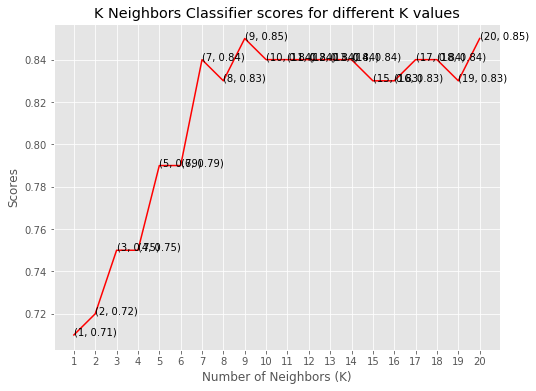

In [20]:
call_function()

<h4>2. Support Vector Machine</h4>

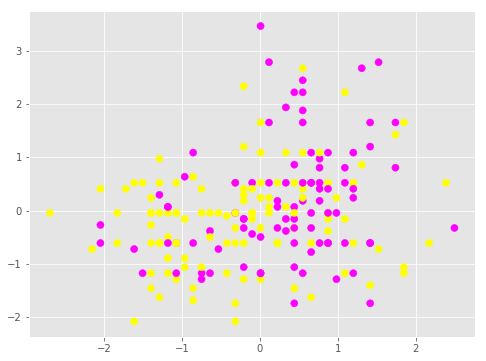

In [21]:
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, s=50, cmap='spring');
plt.show()

Using standard library

In [22]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.8)


In [24]:
# Model Precision: what percentage of positive tuples are labeled as such?
print ("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print ("Recall:",metrics.recall_score(y_test, y_pred))

('Precision:', 0.8269230769230769)
('Recall:', 0.7962962962962963)


<h4>3. Random Forest Classifier</h4>

In [25]:
# Import Random Forest Classifier model from scikit-learn

from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_scores = []
# estimators have the different number of decision trees that the classifier will consider to make the predictions. 

estimators = [ 10, 100, 200, 500, 1000,]
#Applying Random Forest classifier for different values of estimators

for i in estimators: 
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    #Appending scores for each value of estimators
    
    rf_scores.append(rf_classifier.score(X_test, y_test))

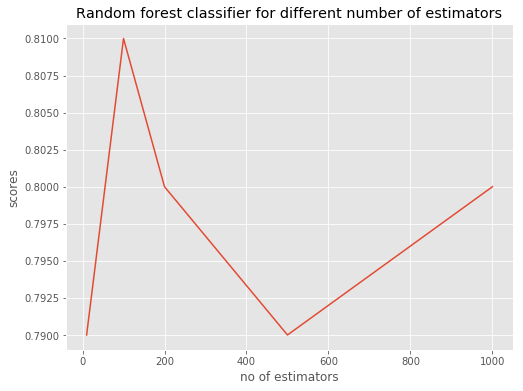

In [27]:

# plotting the points  
plt.plot(estimators,rf_scores)   
# naming the x axis 
plt.ylabel('scores') 
# naming the y axis 
plt.xlabel('no of estimators')    
# giving a title to my graph 
plt.title('Random forest classifier for different number of estimators')   
# function to show the plot 
plt.show() 

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
#predicting values
y_pred = rf_classifier.predict(X_test)
print("Maximum score achieved",max(rf_scores))
print('accuracy of model is : ', accuracy_score(y_test, y_pred))
print ("Precision:",metrics.precision_score(y_test, y_pred))

# to evaluate the quality of the output of a classifier
print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

('Maximum score achieved', 0.81)
('accuracy of model is : ', 0.8)
('Precision:', 0.8035714285714286)
('Confusion Matrix:', '\n', array([[35, 11],
       [ 9, 45]], dtype=int64))


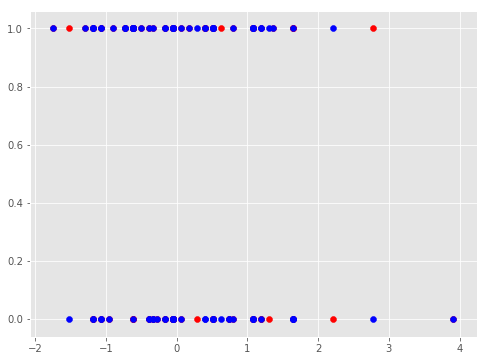

In [29]:
plt.scatter(X_test[:, 1],y_test,color ='red')
plt.scatter(X_test[:,1],y_pred, color = 'blue')
plt.show()

# We can clearly see the results in the graph. The values that are in a different color are predicted wrong rest are right.

<h4>4. Decision Tree</h4>

In [30]:
from sklearn.tree import DecisionTreeClassifier


In [31]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_predict = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_predict,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_predict = dt.predict(X_test)

In [32]:
score_dt = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 76.0 %


In [33]:
dataset2 = pd.read_csv('heart.csv')
temp = []
for i, j in dataset2.iterrows():
    temp.append(j)

each_row = []
for i in range(len(temp)):
    temp2 = []
    for j in range(14):
        temp2.append(temp[i][j])
    each_row.append(temp2)
#print(len(each_row))
#print(each_row)

In [34]:
def predict_class_knn(input_point):
    list1=[]
    for i in range(len(each_row)):
        #intermediate temporary list
        temp = []
        #get distance between test point and each dataset point
        distt = minkowski_distance(input_point, each_row[i])
        temp.append(distt)
        temp.append(each_row[i])
        #temp will contain each element of list1
        #it will be set to [] for each iteration of the loop

        #list1 elements will have format : dist, dataset point
        list1.append(temp)
    
    #print(list1)
    #list1 is sorted in increasing order of the distances
    list1.sort()
    #print "Sorted list is : ",list1

    #accuracy is highest for k=9
    k = 9
    #to count the number of class 0
    count0 = 0
    #to count the number of class 1
    count1 = 0

    for i in range(k):
        #first element of list1 is the distance
        distx = list1[i][0]
        #second element of list1 is the dataset point
        pointx = list1[i][1]
        #the last element of point is the class
        classx = pointx[-1]
        print "\n"
        print "Distance : ",distx
        print "Point : ",pointx
        print "Class : ",classx
        #for class 0 increase count0
        if classx == 0 :
            count0 += 1
        #for class 1 increase count1
        else : 
            count1 += 1

    print "\nNumber of 0 classes for k = ",k," is ",count0
    print "Number of 1 classes for k = ",k," is ",count1
    if count0 > count1 : 
        print "\nClass assigned is : ",0
        return 0
    if count0 < count1 : 
        print "\nClass assigned is : ",1
        return 1
    if count0 == count1 : 
        print "\nTIE. No Class assigned"
        return "Tie"
        
#driver
#xm = [63, 1, 3, 145, 233, 1, 0, 150, 145, 2.3, 0, 0, 1]
#print(dataset2)
#predict_class_knn(xm)

### 7. Model Selection and Application

<h4>Here we declare that KNN is the algorithm which gives largest accuracy of 85%. <br> So, we are here implementing KNN.</h4>

In [35]:
import tkinter
from tkMessageBox import showerror

In [36]:
def check_error(list1):
    cities = ["Agra","Ahmedabad","Amritsar","Banglore","Bhopal",
              "Chennai","Coimbatore","Delhi","Gwalior","Hyderabad",
              "Indore","Jabalpur","Jaipur","Kanpur","Kochi",
              "Kolkata","Kota","Lucknow","Madurai","Merrut",
              "Mumbai","Nagpur","Patna","Pune","Raipur",
             "Ranchi","Srinagar","Surat","Vadodara","Vijaywada"]
    # 0    1   2     3       4      5      6    7    8     9      10      11  12  13    14     15    16  
    #name age sex chestPain rbp serumChol fbs ecg thalach exang oldpeak slope ca thal phone email city
    for i in range(len(list1)):
        if list1[i] == "":
            return 1
        
    if list1[2] < 0 or list1[2] > 1 :
        return 2
    
    if list1[3] < 0 or list1[3] > 4 :
        return 3
    
    if list1[4] < 94 or list1[4] > 200 : 
        return 4
    
    if list1[6] < 0 or list1[6] > 4 : 
        return 6
    
    if list1[7] < 0 or list1[7] > 2 : 
        return 7
    
    if list1[8] < 71 or list1[8] > 202 : 
        return 8
    
    if list1[9] < 0 or list1[9] > 1 : 
        return 9
    
    if list1[10] < 0 or list1[10] > 6.2 : 
        return 10
    
    if list1[11] < 0 or list1[11] > 2 : 
        return 11
    
    if list1[12] < 0 or list1[12] > 3 : 
        return 12
    
    if list1[13] < 0 or list1[13] > 3 : 
        return 13
    
    if len(list1[14]) != 10 : 
        return 14
    
    if list1[16] not in cities: 
        return 16
        
    return 0

In [ ]:
import webbrowser



TRAINING PHASE : 
[0.71, 0.72, 0.75, 0.75, 0.79, 0.79, 0.84, 0.83, 0.85, 0.84, 0.84, 0.84, 0.84, 0.84, 0.83, 0.83, 0.84, 0.84, 0.83, 0.85]
The score for K Neighbors Classifier is 85.0% with 9 neighbors.
0.85
9
('ERROR : ', 0)
[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]


TESTING PHASE : 


Distance :  0.0
Point :  [63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0, 1.0]
Class :  1.0


Distance :  25.3
Point :  [61.0, 1.0, 3.0, 134.0, 234.0, 0.0, 1.0, 145.0, 0.0, 2.6, 1.0, 2.0, 2.0, 0.0]
Class :  0.0


Distance :  26.5
Point :  [69.0, 0.0, 3.0, 140.0, 239.0, 0.0, 1.0, 151.0, 0.0, 1.8, 2.0, 2.0, 2.0, 1.0]
Class :  1.0


Distance :  30.9
Point :  [62.0, 0.0, 0.0, 150.0, 244.0, 0.0, 1.0, 154.0, 1.0, 1.4, 1.0, 0.0, 2.0, 0.0]
Class :  0.0


Distance :  31.5
Point :  [62.0, 1.0, 2.0, 130.0, 231.0, 0.0, 1.0, 146.0, 0.0, 1.8, 1.0, 3.0, 3.0, 1.0]
Class :  1.0


Distance :  33.3
Point :  [46.0, 1.0, 2.0, 150.0, 231.0, 0.0, 1.0, 147.0, 0.0, 3.6, 1.0, 0.0, 2.0, 0.0]
Clas

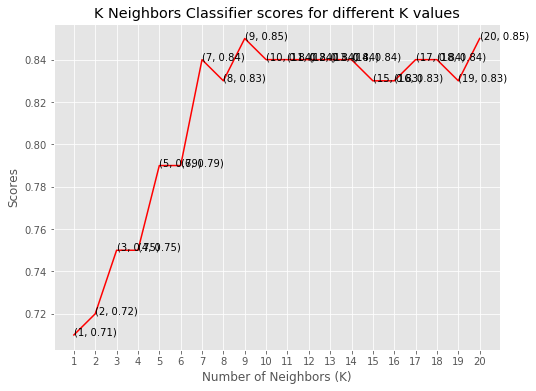

In [45]:
def show_accuracy():
    
    print("\n")
    print("TRAINING PHASE : ")
    max_acc, optimal_k = call_function()
    text1 = " Accuracy ",max_acc*100,"%"
    text2 = " Optimal Value of k ",optimal_k
     
    substituteWindow = tkinter.Tk()
    substituteWindow.geometry('640x480-8-200')
    substituteWindow.title("TRAINING PHASE RESULTS")

    substituteWindow.columnconfigure(0, weight=2)
    substituteWindow.columnconfigure(1, weight=1)
    substituteWindow.columnconfigure(2, weight=2)
    substituteWindow.columnconfigure(3, weight=2)
    substituteWindow.rowconfigure(0, weight=1)
    substituteWindow.rowconfigure(1, weight=2)
    substituteWindow.rowconfigure(2, weight=2)
    substituteWindow.rowconfigure(3, weight=1)
    substituteWindow.rowconfigure(4, weight=1)
    substituteWindow.rowconfigure(5, weight=1)

    label1 = tkinter.Label(substituteWindow, text="KNN has the best accuracy", font=('Impact', -25), fg='#0080ff')
    label1.grid(row=0, column=1, columnspan=2)
    label2 = tkinter.Label(substituteWindow, text = text1 , font=('Impact', -20), fg='red')
    label2.grid(row=1, column=1, columnspan=2)
    label3 = tkinter.Label(substituteWindow, text = text2 , font=('Impact', -20), fg='red')
    label3.grid(row=2, column=1, columnspan=2)
    
    testButton = tkinter.Button(substituteWindow, text="...TEST...", font=('Impact', -15), bg = 'red', command=test_model)
    testButton.grid(row=4, column=1, columnspan=2)

    substituteWindow.mainloop()

    
def test_model():
    inputValues = []
    
    name1 = name.get()
    age1 = int(age.get())
    sex1 = int(sex.get())
    chestPain1 = int(chestPain.get())
    trestbps1 = int(rbp.get())
    chol1 = int(serumChol.get())
    fbs1 = int(FBS.get())
    ecg1 = int(ECG.get())
    thalach1 = int(thalach.get())
    exang1 = int(exang.get())
    oldpeak1 = float(oldpeak.get())
    slope1 = int(slope.get())
    ca1 = int(ca.get())
    thal1 = int(thal.get())
    phone1 = phone.get()
    email1 = email.get()
    city1 = city.get()
    
    list1 = []
    list1.append(name1)
    list1.append(age1)
    list1.append(sex1)
    list1.append(chestPain1)
    list1.append(trestbps1)
    list1.append(chol1)
    list1.append(fbs1)
    list1.append(ecg1)
    list1.append(thalach1)
    list1.append(exang1)
    list1.append(oldpeak1)
    list1.append(slope1)
    list1.append(ca1)
    list1.append(thal1)
    list1.append(phone1)
    list1.append(email1)
    list1.append(city1)

    err = check_error(list1)
    print("ERROR : ",err)
    
    if err != 0:
        showerror(title = "Error", message = "Enter correct details")
    
    if err == 0:
        inputValues.append( age1 )
        inputValues.append( sex1 ) 
        inputValues.append( chestPain1 ) 
        inputValues.append( trestbps1 ) 
        inputValues.append( chol1 ) 
        inputValues.append( fbs1 ) 
        inputValues.append( ecg1 )  
        inputValues.append( thalach1 ) 
        inputValues.append( exang1 )
        inputValues.append( oldpeak1 ) 
        inputValues.append( slope1 ) 
        inputValues.append( ca1 )
        inputValues.append( thal1 ) 

        print(inputValues)

        print("\n")
        print("TESTING PHASE : ")
        final_Result = predict_class_knn(inputValues)
        print("Class assigned : ",final_Result)

        substituteWindow2 = tkinter.Tk()
        substituteWindow2.geometry('640x480-8-200')
        substituteWindow2.title("RESULT PREDICTION")

        substituteWindow2.columnconfigure(0, weight=2)
        substituteWindow2.columnconfigure(1, weight=1)
        substituteWindow2.columnconfigure(2, weight=2)
        substituteWindow2.columnconfigure(3, weight=2)
        substituteWindow2.rowconfigure(0, weight=1)
        substituteWindow2.rowconfigure(1, weight=10)
        substituteWindow2.rowconfigure(2, weight=10)
        substituteWindow2.rowconfigure(3, weight=1)
        substituteWindow2.rowconfigure(4, weight=1)
        substituteWindow2.rowconfigure(5, weight=1)
        substituteWindow2.rowconfigure(6, weight=1)
        substituteWindow2.rowconfigure(7, weight=1)
        
        #city1 = "Nagpur"
        city_list = ["Agra","Ahmedabad","Amritsar","Banglore","Bhopal",
                     "Chennai","Coimbatore","Delhi","Gwalior","Hyderabad",
                     "Indore","Jabalpur","Jaipur","Kanpur","Kochi",
                     "Kolkata","Kota","Lucknow","Madurai","Merrut",
                     "Mumbai","Nagpur","Patna","Pune","Raipur",
                     "Ranchi","Srinagar","Surat","Vadodara","Vijaywada"]
        website_list = [["https://www.globalheartinstituteagra.com/",
                       " https://rainbowhospitals.org/",
                        "https://www.agraheartcentre.com/"
                        ],
            ["https://www.cims.org/cardiology/",
            "https://www.apexheart.in/",
            "https://www.shalby.org/contact-us/sg-shalby-hospital/"
            ],
            ["https://dr-yadvinder-singh-cardiologist-in-amritsar.business.site/",
            "http://mananheartcare.com/",
            "http://www.holyhearthospital.com/"
            ],
            ["http://www.jayadevacardiology.com/",
            "https://www.manipalhospitals.com/?utm_source=GBL&utm_medium=organic",
            "https://www.narayanahealth.org/hospitals/bangalore/narayana-institute-cardiac-sciences-bommasandra?utm_source=narayana-institute-cardiac-sciences-bommasandra&utm_medium=GMB_Hospital&utm_campaign=Organic"
            ],
            ["https://ubuntuhospital.business.site/?utm_source=gmb&utm_medium=referral",
            "https://www.bestcardiologistbhopal.com/",
            "https://madhavbaug.org/"
            ],
            ["https://chennai.apollohospitals.com/hospitals/apollo-heart-centre",
            "https://www.vhospitals.com/",
            "https://drsengottuvelu.com/"
            ],
            ["https://www.sriramakrishnahospital.com/",
            "https://theheartandlungclinic.com/",
            "https://www.jkpmedicalcenter.com/"
            ],
            ["https://www.metrohospitals.com/group-hospitals/metro-hospital-heart-institute-lajpat-nagar-delhi",
            "http://www.ganeshshivnani.com/",
            "http://kukrejahospital.in/"
            ],
            ["https://globalshospital.com/",
            "https://veena-heart-care-centre.business.site/",
            "https://www.apollospectra.com/our-hospitals/gwalior/vikas-nagar/best-hospital-in-vikas-nagar-gwalior/?utm_source=Google&utm_medium=GoogleMap&utm_campaign=GoogleMapGwalior"
            ],
            ["http://www.starexclinic.com/",
            "*9391554109",
            "https://www.balajiheartcenter.com/"
            ],
            ["http://www.nakshatrahospital.com/",
            "https://indore.apollohospitals.com/",
            "http://www.arihanthospital.org/"
            ],
            ["http://jabalpurhelpline.com/nema-heart-hospital",
            "http://www.spandanheartstation.com/",
            "https://jabalpurhelpline.com/patel-heart-clinic-and-diagnostic-centre-dr-pushpraj-patel"
            ],
            ["https://www.eternalhospital.com/",
            "http://amitcardiologistgupta.business.site/",
            "http://www.jaipurheartcentre.com/"
            ],
            ["http://www.krishnahospital.org.in/",
            "http://www.shivanihospital.com/",
            "https://www.satyahospitals.com/"
            ],
            ["https://sunrisehospitalcochin.com/",
            "http://www.samaritanhospital.in/",
            "https://lourdeshospital.in/"
            ],
            ["https://www.narayanahealth.org/kolkata/cardiology-adult/dr-abhijit-chatterjee",
            "https://www.narayanahealth.org/kolkata/cardiology-adult/dr-auriom-kar",
            "https://www.narayanahealth.org/kolkata/cardiology-adult/dr-amitabha-sengupta"
            ],
            ["drsaketgoyalcardio.com",
            "mittalheartclinic.com",
            "https://www.facebook.com/Dr-Dinesh-Bindal-cardiologist-516455985184726/"
            ],
            ["http://www.saharahospitals.com/",
            "https://www.practo.com/lucknow/clinic/dr-madhuker-kapoor-clinic-golaganj?"
            "http://www.drrakeshkumarcardio.com/"
            ],
            ["maduraicardiologist.com",
            "drselvamanis.com",
            "https://www.askapollo.com/doctors/cardiologist/madurai/dr-vivek-bose-c"
            ],
            ["https://www.anandhospital.com/our-doctors/",
            "drvineetbansal.com",
            "https://www.metrohospitals.com/doctors/sanjeev-saxena-dr"
            ],
            ["http://www.asianheartinstitute.org/",
            "https://en.wikipedia.org/wiki/Nanavati_hospital",
            "https://globalhospitalsmumbai.com/"
            ],
            ["http://platinahospital.com/home/doctors",
            "https://www.practo.com/nagpur/doctor/dr-manish-m-juneja-cardiothoracic-surgeon",
            "https://www.practo.com/nagpur/doctor/rhishikesh-umalkar-cardiologist"
            ],
            ["dakshheartcare.in",
            "https://dr-ram-sagar-roy-cardiologist.business.site/",
            "drrajivkrishna.com"
            ],
            ["https://www.bestcardiologistpune.com/heart-clinic-in-pune/",
            "https://www.hridaymitracardiaclinic.com/interventional-cardiologist-in-pune/",
            "cardiologypune.com"
            ],
            ["https://threebestrated.in/cardiologists-in-raipur-cg",
            "http://www.shriclinics.com/doctor/dr-smit-shrivastava",
            "https://www.narayanahealth.org/raipur/cardiology-adult/dr-sumanta-shekhar-padhi"
            ],
            ["https://threebestrated.in/cardiologists-in-ranchi-jh",
            "https://www.credihealth.com/doctor/niraj-prasad-cardiologist/overview?hcc_id=803",
            "https://aarogyam-cardiac-clinic.business.site/"
            ],
            ["https://remedoapp.com/rweb/doctors/dr-khurshid-iqbal/consult",
            "https://www.lybrate.com/srinagar/doctor/dr-aijaz-mansoor-cardiologist",
            'http://www.shifamedcenter.com/'
            ],
            ['drdevangdesai.com',
            "drdhavalshah.net",
            "http://drrajivkharwar.com/about-dr-rajiv-kharwar/"
            ],
            ["drvirendrasinhchauhan.com",
            "https://dr-krish-vaidyas-icure-heart-clinic.business.site/",
            "drkaushiktrivedi.com"
            ],
            ["https://www.practo.com/vijayawada/doctor/dr-murali-krishna-nallamothu-cardiologist?practice_id=758357&specialization=cardiologist",
            "https://heartcarecenter.co.in/about-us",
            "https://www.facebook.com/l9848012500/?rf=899553393519834"
            ]]
        
        doctor_list = [
            ["Dr. Suvir Gupta","Dr. Vinesh Jain","Dr. C R Rawat"],
            ["Dr. Dhiren Shah","Dr. Tejas Patel","Dr. Vikram Shah"],
            ["Dr. Yadvinder Singh","Dr. Manan Anand","Dr. Harshbir Singh Pannu"],
            ["Dr. C N Manjunath","Dr.(col) R D Holla","Dr. Devi Prasad Shetty"],
            ["Dr. Mandal Subroto","Dr. R K Singh","Dr. Rohit Madhav Sane"],
            ["Dr. Sahukat Irfan Shah","Dr. Gaurav Sahai","Dr. G.Sengottuvelu"],
            ["Dr. Gokul Krishnan","Dr. Majid","Dr. J K P"],
            ["Dr. Purushottam Lal","Dr. Ganesh Shivani","Dr. Rajnish Kukreja"],
            ["Dr. S Sridhar","Dr. Dushyant Deo","Dr. Meenakshi Sundaram"],
            ["Dr. Vishwanath M","Dr. S Shivakumar Reddy","Dr. R Balaji"],
            ["Dr. Nirangan Garg","Dr. Siddhant Jain","Dr. Prakash Bangani"],
            ["Dr. Ram Narayan Nema","Dr. Niteen Deshpande","Dr. Pushpraj Patel"],
            ["Dr. K K Sharma","Dr. Amit Gupta","Dr. Vijay Pathak"],
            ["Dr. Ajit Kumar Rawat","Dr. Shivaanshu Misra","Dr. Mahalakshmi R"],
            ["Dr. Keerthy Rajan","Dr. Himal Raj . M","Dr. Praveena Elizabeth Joseph"],
            ["Dr. Abhijit Chatterjee","Dr. Auriom Kar","Dr. Amitabha Sengupta"],
            ["DR. SAKET GOYAL",'DR. PURUSHOTTAM MITTAL',"DR. DINESH BINDAL"],
            ["Dr. Mansoor Hasan","Dr. Madhukar Kapoor","Dr. Rakesh Kumar"],
            ["DR. B R J KANNAN","DR. S. SELVAMANI","DR. VIVEK BOSE CHANDRABOSE"],
            ["DR. ASHOK KUMAR GUPTA","DR. VINEET BANSAL",'Dr. Sanjeev Saxena'],
            ["Dr. Ramakant Panda",'Dr. Abhishek Laxman Wadkar',"Dr. Sandeep Attawar"],
            ["DR. PRAMOD MUNDRA","DR. MANISH JUNEJA","DR. RHISHIKESH UMALKAR"],
            ["DR. VIKAS SINGH","DR. RAM SAGAR ROY","DR. RAJIV KRISHNA"],
            ["DR. RAHUL PATIL","DR. RAHUL. D. SAWANT","DR. RAJESH DHOPESHWARKAR"],
            ["DR. PRASHANT ADVANI","DR. SMIT SHRIVASTAVA","DR. SUMANTA SHEKHAR PADHI"],
            ["DR. KUSHAGRA MAHANSARIA","Dr Niraj Prasad","Dr.Ekam Kumar"],
            ["Dr. Khurshid Iqbal","Dr Aijaz Mansoor","DR. KAISER HABIB"],
            ["DR. DEVANG MAHESHCHANDRA DESAI","DR. DHAVAL HASMUKHLAL SHAH","DR. RAJIV KHARWAR"],
            ["DR. VIRENDRASINH C CHAUHAN","DR. KRISH VAIDYA","DR. KAUSHIK K TRIVEDI"],
            ["Dr. Murali Krishna Nallamothu","DR. PALLEM PEDDESWARA RAO","DR. Y. V. RAO"]]
        
        hospital_list = [["Global Heart Institute","Global Rainbow Health Care","Agra Heart Center"],
            ["Care Institute of Medical Sciences (CIMS)","Apex Heart institute","Shalby Hospital"],
            ["Amandeep Medicity","Man Heart Care","Holy Heart Hospital"],
            ["Sri Jayadeva Institute of Cardiovascular Sciences and Research","Manipal Hospital","Narayan Health"],
            ["Ubuntu Heart Hospital","Hamidia Hospital","Madhavbaug Hospital"],
            ["Apollo Heart Center","Venkateshwar Hospitals","G S Heart Clinic"],
            ["Shri Ramakrishna Hospital","The heart and lung Clinic","Dr. J K P Medical Center"],
            ["Metro Group of Hospitals","Ganesh Shivani Clinic","Kukreja Hospital and Heart Center"],
            ["Global Speciality Hospital","Veena Heart Care Center","Apollo Spectra Hospital"],
            ["Starex Multi Specialty Clinic","Vaishnavi Heart Clinic","Balaji Heart Center"],
            ["Nakshatra Heart and Multispeciality Hospital","Apollo Hospitals Indore","Arihant Hospital & Research Centre"],
            ["Nema Heart Hospital","Spandan Heart Station","Heart Specialist In Jabalpur"],
            ["Eternal Multispeciality Hospital","Best Heart Specialist/Intervention Cardiologist/Doctor Angiography Angioplasty Jaipur","Jaipur Heart Center"],
            ["Krishna Super Speciality Hospital","Shivani Hospital & IVF,Satya Hospital"],
            ["Sunrise Hospital","Samaritan Heart Institute","Lourdes Hospital"],
            ["Rabindranath Tagore International Institute of Cardiac Sciences","Narayana Multispeciality Hospital","Rabindranath Tagore International Institute of Cardiac Sciences"],
            ["Kota Heart Institute","Mittal Heart Centre","Dr. Dinesh Bindal Clinic"],
            ["Sahara Hospital","Dr. Madhukar Kapoor Clinic","Dr. Rakesh Kumar Clinic"],
            ["VADAMALAYAN HOSPITALS","MEENAKSHI MISSION HOSPITAL & RESEARCH CENTRE","APOLLO SPECIALITY HOSPITALS"],
            ["ANAND HOSPITAL","ANAND HOSPITAL","Metro Hospital & Heart Institute"],
            ["Asian Heart Institute","Nanavati Super-specialty Hospital","Global Hospital", "Parel"],
            ["Platina Heart Hospital","RHYTHM HEART CARE","MANOMAY CARDIAC CARE AND IMAGING CENTRE"],
            ["DAKSH HEART CARE","DR. RAM SAGAR ROY clinic","HEART CLINIC"],
            ["HRIDAYAM HEART CARE CLINIC","HRIDAYMITRA CARDIA CLINIC,""HEART RHYTHM & HEART FAILURE CLINIC"],
            ["ADVANI HEARTLINE & METABOLIC CENTRE","DR. SMIT SHRIVASTAVA Clinic","MMI NARAYANA MULTISPECIALITY HOSPITAL"],
            ["RANCHI PULSE CENTER","Medanta Ranchi","Aarogyam Cardiac Clinic"],
            ["Florence Heart Center","KHYBER MEDICAL INSTITUTE","SHIFA MEDICAL CENTRE"],
            ["HRIDYAM HEART CARE CLINIC","ICONIC HEART CLINIC","Kharwar Clinic"],
            ["ATMAJYOTI CARDIAC CLINIC","ICURE HEART AND DIET CLINIC","CITY HEART CENTRE"],
            ["Manipal Hospital","HEART CARE CENTRE","USHA CARDIAC CENTRE"]]
        
        

        if final_Result == 1:
            list1.append("Patient is in risk of Heart Disease")
            text1 = ""
            text2 = ""
            text3 = ""
            for i in range(len(city_list)):
                if city1 == city_list[i]:
                    temp1 = doctor_list[i]
                    temp2 = hospital_list[i]
                    temp3 = website_list[i]
                    text1 = temp1[0] + " from " + temp2[0] + "\tWebsite : " + temp3[0]
                    text2 = temp1[1] + " from " + temp2[1] + "\tWebsite : " + temp3[1]
                    text3 = temp1[2] + " from " + temp2[2] + "\tWebsite : " + temp3[2]
                
            print(text1)
            print(text2)
            print(text3)
            label1 = tkinter.Label(substituteWindow2, text="HEART DISEASE DETECTED", font=('Impact', -35), fg='#0080ff')
            label1.grid(row=0, column=1, columnspan=6)
            label2 = tkinter.Label(substituteWindow2, text="PLEASE VISIT NEAREST CARDIOLOGIST AT THE EARLIEST", font=('Impact', -20), fg='red')
            label2.grid(row=1, column=1, columnspan=6)
            label3 = tkinter.Label(substituteWindow2, text = text1, font=('Times', -15))
            label3.grid(row=3, column = 2)
            
            label4 = tkinter.Label(substituteWindow2, text = text2, font=('Times', -15))
            label4.grid(row=4, column = 2)
            
            label5 = tkinter.Label(substituteWindow2, text = text3, font=('Times', -15))
            label5.grid(row=5, column = 2)

        else: 
            label1 = tkinter.Label(substituteWindow2, text="NO DETECTIOIN OF HEART DISEASES", font=('Impact', -35) )
            label1.grid(row=2, column=1, columnspan=6)
            label2 = tkinter.Label(substituteWindow2, text="Do not forget to exercise daily. ", font=('Impact', -20), fg='green')
            label2.grid(row=3, column=1, columnspan=6)     
        substituteWindow2.mainloop()


mainWindow = tkinter.Tk()
mainWindow.geometry('640x480-8-200')
mainWindow['padx']=20
mainWindow.title("HEART DISEASE PREDICTION")

mainWindow.columnconfigure(0, weight=2)
mainWindow.columnconfigure(1, weight=1)
mainWindow.columnconfigure(2, weight=2)
mainWindow.columnconfigure(3, weight=2)
mainWindow.rowconfigure(0, weight=0)
mainWindow.rowconfigure(1, weight=0)
mainWindow.rowconfigure(2, weight=1)
mainWindow.rowconfigure(3, weight=1)
mainWindow.rowconfigure(4, weight=1)
mainWindow.rowconfigure(5, weight=1)
mainWindow.rowconfigure(6, weight=1)
mainWindow.rowconfigure(7, weight=1)
mainWindow.rowconfigure(8, weight=10)


label1 = tkinter.Label(mainWindow, text="HEART DISEASE PREDICTION MODEL", font=('Impact', -35), bg='#ff8000')
label1.grid(row=0, column=0, columnspan=6)

label2 = tkinter.Label(mainWindow, text="Enter the details carefully", font=('Impact', -20) , fg='white', bg='#ff00bf' )
label2.grid(row=1, column=0, columnspan=6)


#frame for the feature inputs
nameFrame = tkinter.LabelFrame(mainWindow, text="Name")
nameFrame.grid(row=2, column=0)
nameFrame.config(font=("Courier", -15))
name = tkinter.Entry(nameFrame)
name.grid(row=2, column=2, sticky='nw')

ageFrame = tkinter.LabelFrame(mainWindow, text="Age(yrs)")
ageFrame.grid(row=2, column=1)
ageFrame.config(font=("Courier", -15))
age = tkinter.Entry(ageFrame)
age.grid(row=2, column=2, sticky='nw')

sexFrame = tkinter.LabelFrame(mainWindow, text="Sex(0-1)")
sexFrame.grid(row=2, column=2)
sexFrame.config(font=("Courier", -15))
sex = tkinter.Entry(sexFrame)
sex.grid(row=2, column=2, sticky='nw')

chestPainFrame = tkinter.LabelFrame(mainWindow, text="CP (0-4)")
chestPainFrame.grid(row=3, column=0)
chestPainFrame.config(font=("Courier", -15))
chestPain = tkinter.Entry(chestPainFrame)
chestPain.grid(row=2, column=2, sticky='nw')


rbpFrame = tkinter.LabelFrame(mainWindow, text="RBP (94-200)")
rbpFrame.grid(row=3, column=1)
rbpFrame.config(font=("Courier", -15))
rbp = tkinter.Entry(rbpFrame)
rbp.grid(row=2, column=2, sticky='nw')

serumCholFrame = tkinter.LabelFrame(mainWindow, text="Serum Chol")
serumCholFrame.grid(row=3, column=2)
serumCholFrame.config(font=("Courier", -15))
serumChol = tkinter.Entry(serumCholFrame)
serumChol.grid(row=2, column=2, sticky='n')

FBSFrame = tkinter.LabelFrame(mainWindow, text="Fasting BP(0-4)")
FBSFrame.grid(row=4, column=0)
FBSFrame.config(font=("Courier", -15))
FBS = tkinter.Entry(FBSFrame)
FBS.grid(row=2, column=2, sticky='nw')

ECGFrame = tkinter.LabelFrame(mainWindow, text="ECG (0,1,2)")
ECGFrame.grid(row=4, column=1)
ECGFrame.config(font=("Courier", -15))
ECG = tkinter.Entry(ECGFrame)
ECG.grid(row=2, column=2, sticky='nw')


thalachFrame = tkinter.LabelFrame(mainWindow, text="thalach(71-202)")
thalachFrame.grid(row=4, column=2)
thalachFrame.config(font=("Courier", -15))
thalach = tkinter.Entry(thalachFrame)
thalach.grid(row=2, column=2, sticky='nw')

exangFrame = tkinter.LabelFrame(mainWindow, text="exAngina(0/1)")
exangFrame.grid(row=5, column=0)
exangFrame.config(font=("Courier", -15))
exang = tkinter.Entry(exangFrame)
exang.grid(row=2, column=2, sticky='nw')


oldpeakFrame = tkinter.LabelFrame(mainWindow, text="Old Peak(0-6.2)")
oldpeakFrame.grid(row=5, column=1)
oldpeakFrame.config(font=("Courier", -15))
oldpeak = tkinter.Entry(oldpeakFrame)
oldpeak.grid(row=2, column=2, sticky='nw')

slopeFrame = tkinter.LabelFrame(mainWindow, text="Slope(0,1,2)")
slopeFrame.grid(row=5, column=2)
slopeFrame.config(font=("Courier", -15))
slope = tkinter.Entry(slopeFrame)
slope.grid(row=2, column=2, sticky='nw')

caFrame = tkinter.LabelFrame(mainWindow, text=" C. A (0-3)")
caFrame.grid(row=6, column=0)
caFrame.config(font=("Courier", -15))
ca = tkinter.Entry(caFrame)
ca.grid(row=2, column=2, sticky='nw')


thalFrame = tkinter.LabelFrame(mainWindow, text=" THAL(0,1,2,3)")
thalFrame.grid(row=6, column=1)
thalFrame.config(font=("Courier", -15))
thal = tkinter.Entry(thalFrame)
thal.grid(row=2, column=2, sticky='nw')

phoneFrame = tkinter.LabelFrame(mainWindow, text=" Phone Number")
phoneFrame.grid(row=7, column=0)
phoneFrame.config(font=("Courier", -15))
phone = tkinter.Entry(phoneFrame)
phone.grid(row=2, column=2, sticky='nw')

emailFrame = tkinter.LabelFrame(mainWindow, text=" Email id")
emailFrame.grid(row=7, column=1)
emailFrame.config(font=("Courier", -15))
email = tkinter.Entry(emailFrame)
email.grid(row=2, column=2, sticky='nw')

cityFrame = tkinter.LabelFrame(mainWindow, text=" City")
cityFrame.grid(row=7, column=2)
cityFrame.config(font=("Courier", -15))
city = tkinter.Entry(cityFrame)
city.grid(row=2, column=2, sticky='nw')



trainButton = tkinter.Button(mainWindow, text="...SHOW ACCURACY...", font=('Impact', -15), bg = 'red', command=show_accuracy)
trainButton.grid(row=8, column=0, columnspan=10)

mainWindow.mainloop()
